In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection, preprocessing
from sklearn.linear_model import LinearRegression
from scipy import stats
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
dfc = df.copy()

In [26]:
dfc.shape

(2111, 17)

In [6]:
dfc.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
dfc.head(11)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [8]:
dfc.rename(columns={'NObeyesdad': 'Obesity_Status'}, inplace=True)

In [9]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [10]:
dfc.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# EDA

In [11]:
dfc.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'Obesity_Status'],
      dtype='object')

# Height and Weight Distribution

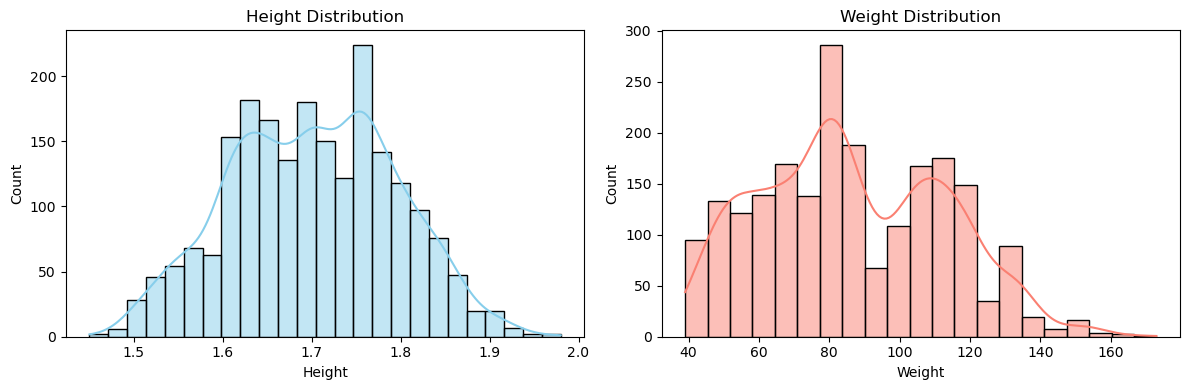

In [12]:
height = dfc['Height']
weight = dfc['Weight']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(height, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Height Distribution')

sns.histplot(weight, ax=axes[1], kde=True, color='salmon')
axes[1].set_title('Weight Distribution')

plt.tight_layout()
plt.show()

# Top 10 Ages with Highest Weight

Top 10 Ages with Highest Weight:
Age
21.900120    165.057269
19.472190    160.935351
21.521294    160.639405
20.989016    155.872093
21.291969    155.242672
20.327723    154.618446
20.102241    153.959945
20.438478    153.149491
18.112503    152.720545
18.120739    152.567671
Name: Weight, dtype: float64


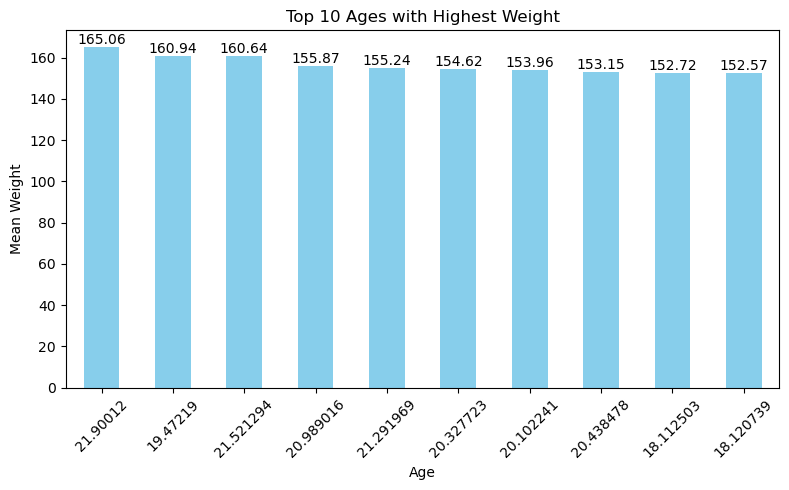

In [13]:
age_weight_mean = dfc.groupby('Age')['Weight'].mean()
top_10_ages_highest_weight = age_weight_mean.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
bars = top_10_ages_highest_weight.plot(kind='bar', color='skyblue')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2),
             ha='center', va='bottom')

plt.title('Top 10 Ages with Highest Weight')
plt.xlabel('Age')
plt.ylabel('Mean Weight')
plt.xticks(rotation=45)
plt.tight_layout()
print("Top 10 Ages with Highest Weight:")
print(top_10_ages_highest_weight)
plt.show()

# Distribution of CAEC values

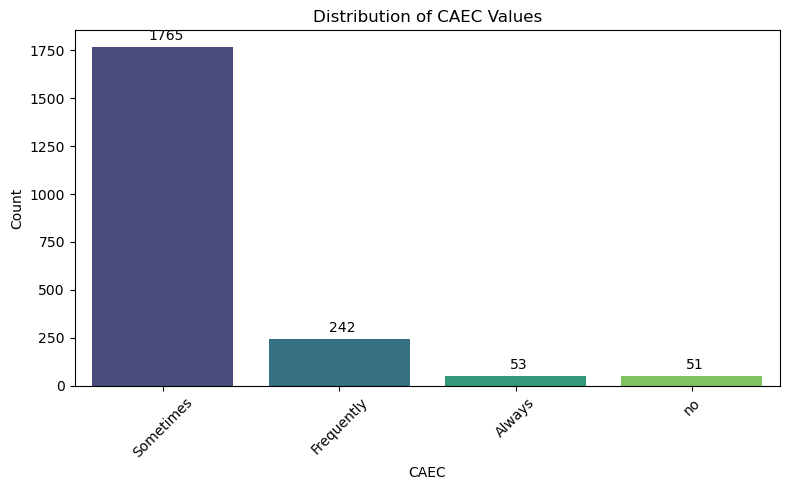

In [14]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=dfc, x='CAEC', palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (2, 8), 
                textcoords = 'offset points')

plt.title('Distribution of CAEC Values')
plt.xlabel('CAEC')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Ages with Family History with Overweight

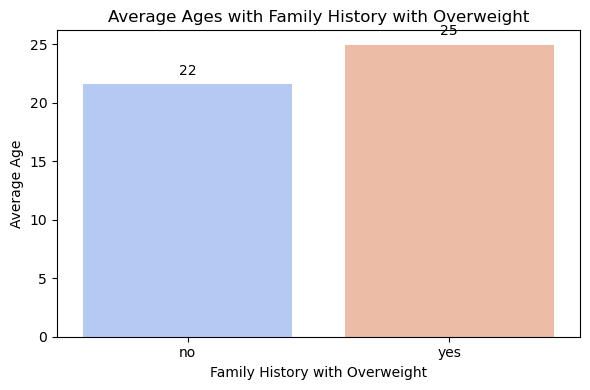

In [15]:
average_age_family_history = dfc.groupby('family_history_with_overweight')['Age'].mean()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=average_age_family_history.index, y=average_age_family_history.values, palette='coolwarm')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.title('Average Ages with Family History with Overweight')
plt.xlabel('Family History with Overweight')
plt.ylabel('Average Age')
plt.tight_layout()
plt.show()

# Correlation matrix

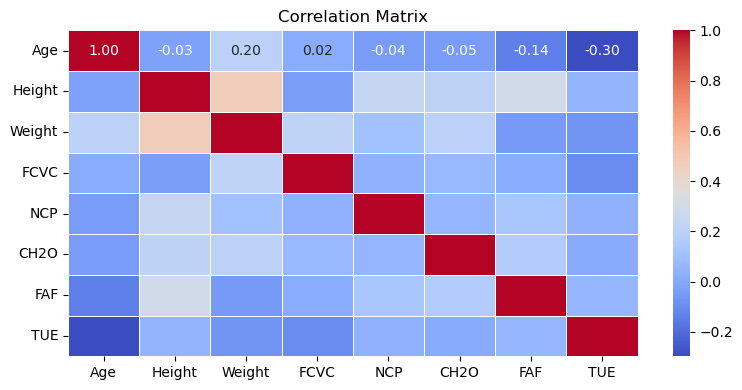

In [16]:
numerical_columns = dfc.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [17]:
categorical_columns = dfc.select_dtypes(include=['object']).columns.tolist()
continuous_columns = dfc.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Continuous columns:", continuous_columns)

Categorical columns: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'Obesity_Status']
Continuous columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [18]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    dfc[column] = label_encoder.fit_transform(dfc[column])

scaler = StandardScaler()
dfc[continuous_columns] = scaler.fit_transform(dfc[continuous_columns])

In [20]:
columns_to_encode = ['CALC', 'CAEC', 'MTRANS']
dfc_encoded = pd.get_dummies(dfc, columns=columns_to_encode)
print(dfc_encoded.head())

        Age  Gender    Height    Weight  FAVC      FCVC       NCP  SCC  SMOKE  \
0 -0.522124       0 -0.875589 -0.862558     0 -0.785019  0.404153    0      0   
1 -0.522124       0 -1.947599 -1.168077     0  1.088342  0.404153    1      1   
2 -0.206889       1  1.054029 -0.366090     0 -0.785019  0.404153    0      0   
3  0.423582       1  1.054029  0.015808     0  1.088342  0.404153    0      0   
4 -0.364507       1  0.839627  0.122740     0 -0.785019 -2.167023    0      0   

       CH2O  ...  CALC_3  CAEC_0  CAEC_1  CAEC_2  CAEC_3  MTRANS_0  MTRANS_1  \
0 -0.013073  ...       1       0       0       1       0         0         0   
1  1.618759  ...       0       0       0       1       0         0         0   
2 -0.013073  ...       0       0       0       1       0         0         0   
3 -0.013073  ...       0       0       0       1       0         0         0   
4 -0.013073  ...       0       0       0       1       0         0         0   

   MTRANS_2  MTRANS_3  MTRANS_4 

In [22]:
dfc_encoded.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'SCC',
       'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'Obesity_Status', 'CALC_0', 'CALC_1', 'CALC_2', 'CALC_3', 'CAEC_0',
       'CAEC_1', 'CAEC_2', 'CAEC_3', 'MTRANS_0', 'MTRANS_1', 'MTRANS_2',
       'MTRANS_3', 'MTRANS_4'],
      dtype='object')

In [23]:
X = dfc_encoded.drop(columns=['Obesity_Status'])
y = dfc_encoded['Obesity_Status'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1688, 26)
X_test shape: (423, 26)
y_train shape: (1688,)
y_test shape: (423,)


# Algorithm

In [32]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    # Predict on the test data
    y_pred = classifier.predict(X_test)
    # Evaluate the classifier's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')

Logistic Regression: Accuracy = 0.87
Decision Tree: Accuracy = 0.94
Random Forest: Accuracy = 0.95
SVM: Accuracy = 0.93


# The algorithm that works best

In [44]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

Accuracy: 0.9550827423167849
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.95      0.91        62
           2       0.99      0.94      0.96        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.94      0.89      0.92        56
           6       0.91      0.96      0.93        50

    accuracy                           0.96       423
   macro avg       0.95      0.96      0.95       423
weighted avg       0.96      0.96      0.96       423

Confusion Matrix (Random Forest):
[[54  2  0  0  0  0  0]
 [ 0 59  0  0  0  1  2]
 [ 0  1 73  2  0  0  2]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 50  1]
 [ 0  0  0  0  0  2 48]]


# THE END